# Identify Type of Particle with Classification

There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types have different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system. The responses in the detector systems will be used to identify a particle type. 

Data files are downloaded from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

Thi snotebook was completed as part of the Addressing Large Hadron Collider Challenges with Machine Learning course of the Advanced Machine Learning specialisation on Coursera.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

In [2]:
data = pandas.read_csv('training.csv.gz')

In [3]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. The task is to predict type of a particle.

In [4]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [5]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](https://github.com/hse-aml/hadron-collider-machine-learning/blob/master/week2/pic/features.jpeg?raw=1)

Also there are several combined features. The full list as follows.

In [6]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['RICH_DLLbeMuon',
 'TrackNDoF',
 'RICH_DLLbeProton',
 'DLLkaon',
 'FlagHcal',
 'RICH_DLLbeKaon',
 'HcalE',
 'PrsDLLbeElectron',
 'Calo2dFitQuality',
 'BremDLLbeElectron',
 'FlagPrs',
 'TrackP',
 'DLLproton',
 'RICHpFlagPion',
 'TrackQualitySubdetector1',
 'TrackNDoFSubdetector1',
 'HcalDLLbeElectron',
 'RICHpFlagMuon',
 'TrackPt',
 'TrackNDoFSubdetector2',
 'SpdE',
 'GhostProbability',
 'DLLmuon',
 'RICHpFlagElectron',
 'MuonLooseFlag',
 'HcalDLLbeMuon',
 'FlagSpd',
 'FlagBrem',
 'DLLelectron',
 'MuonLLbeBCK',
 'FlagEcal',
 'EcalShowerLongitudinalParameter',
 'MuonLLbeMuon',
 'TrackDistanceToZ',
 'EcalE',
 'FlagRICH2',
 'RICHpFlagProton',
 'FlagRICH1',
 'RICH_DLLbeBCK',
 'FlagMuon',
 'EcalDLLbeElectron',
 'MuonFlag',
 'TrackQualitySubdetector2',
 'RICH_DLLbeElectron',
 'PrsE',
 'EcalDLLbeMuon',
 'Calo3dFitQuality',
 'TrackQualityPerNDoF',
 'RICHpFlagKaon']

### Divide training data into training and validation

In [7]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

In [8]:
len(training_data), len(validation_data)

(1080000, 120000)

In [9]:
training_data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Class
968874,12192.330089,17.0,-0.170024,0.0,1.0,0.0,-1.831868,-0.996012,1.0,5.017775e-01,...,1.0,-19.783108,-6.720408,1914.190913,1.0,1.0,1.967353e-06,-2.804208,-25.041909,1
912808,40379.488299,7.0,-999.000000,0.0,0.0,-999.0,-999.000000,-0.792678,1.0,-9.990000e+02,...,1.0,-14.755493,-2.304893,-999.000000,0.0,1.0,-9.990000e+02,-0.967993,-18.450494,4
30045,5294.729989,12.0,-0.381504,1.0,1.0,3.2,-0.589851,-2.054347,1.0,-2.142670e+00,...,1.0,13.137106,-7.920494,2567.385966,1.0,1.0,7.569901e+01,-1.713094,13.416006,3
313784,4645.819821,17.0,-0.417099,1.0,1.0,3.2,0.649028,-8.301831,1.0,7.650223e-07,...,1.0,-22.006791,-24.447692,256.265351,0.0,1.0,1.919901e+00,-7.184691,-17.656691,1
100864,3100.629887,17.0,-0.553602,0.0,1.0,3.2,-2.723420,-12.468398,1.0,-1.438773e+00,...,1.0,0.807007,-50.220193,0.000011,0.0,1.0,-8.050605e-07,-9.541493,0.771707,2


In [10]:
training_data[features].describe()

,RICH_DLLbeMuon,TrackNDoF,RICH_DLLbeProton,DLLkaon,FlagHcal,RICH_DLLbeKaon,HcalE,PrsDLLbeElectron,Calo2dFitQuality,BremDLLbeElectron,...,FlagMuon,EcalDLLbeElectron,MuonFlag,TrackQualitySubdetector2,RICH_DLLbeElectron,PrsE,EcalDLLbeMuon,Calo3dFitQuality,TrackQualityPerNDoF,RICHpFlagKaon
count,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,...,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06
mean,-4.926364e+01,2.942315e+01,-5.229568e+01,-1.452442e+01,7.646630e-01,-5.190322e+01,2.898032e+03,-1.500610e+02,-1.674038e+02,-2.076723e+02,...,8.207509e-01,-1.829481e+02,1.662343e-01,1.609497e+01,-5.109546e+01,-1.340039e+02,-1.831246e+02,1.003561e+03,1.282943e+00,4.059546e-01
std,2.148977e+02,6.026995e+00,2.153698e+02,1.074946e+02,4.242095e-01,2.154569e+02,7.656111e+03,3.550281e+02,3.969166e+02,4.054207e+02,...,3.835609e-01,3.855809e+02,3.722910e-01,7.769702e+00,2.152222e+02,3.630068e+02,3.854955e+02,2.408174e+03,6.270840e-01,4.910761e-01
min,-9.990000e+02,7.000000e+00,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,0.000000e+00,-9.990000e+02,0.000000e+00,3.229625e-04,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,4.504852e-02,0.000000e+00
25%,-4.503437e+00,2.600000e+01,-1.618322e+01,-1.069791e+01,1.000000e+00,-1.469696e+01,-1.446553e-05,-3.062679e+00,9.502276e-02,-6.250978e-01,...,1.000000e+00,-3.000639e+00,0.000000e+00,1.071093e+01,-1.309732e+01,9.201665e-06,-3.367626e+00,-9.990000e+02,8.856753e-01,0.000000e+00
50%,-4.692121e-01,3.000000e+01,-2.947544e-06,2.762477e-06,1.000000e+00,-1.248008e-06,5.772029e+02,-2.730653e+00,8.067113e-01,-5.329020e-01,...,1.000000e+00,-2.315904e+00,0.000000e+00,1.524483e+01,-2.355985e+00,2.468449e+00,-1.956066e+00,1.286276e+02,1.106393e+00,0.000000e+00
75%,1.300734e+00,3.400000e+01,8.919904e+00,8.460730e+00,1.000000e+00,8.457116e+00,3.047605e+03,-1.331085e+00,4.362203e+00,-5.933648e-02,...,1.000000e+00,5.918626e-01,0.000000e+00,2.041093e+01,1.672999e+00,8.776679e+00,4.339372e-01,1.657563e+03,1.448324e+00,1.000000e+00
max,1.428335e+02,5.200000e+01,1.462984e+02,1.681698e+02,1.000000e+00,1.588015e+02,7.985253e+05,3.463160e+00,9.984028e+02,4.791513e+00,...,1.000000e+00,4.341298e+00,1.000000e+00,1.048634e+02,1.861542e+02,2.805800e+02,2.153017e+00,9.999937e+03,3.999967e+00,1.000000e+00


In [11]:
training_data[features].isnull().any().any()

False

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scale = scaler.fit_transform(training_data[features].values)

In [13]:
validation_scale = scaler.transform(validation_data[features].values)

The goal is to achieve the lowest log loss value as possible. Two classifiers will be trained on training data, ad then tested on the validation data. The model that produces the lowest log loss on the validation dataset will be used to generate predictions on the unknown test data.

## Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.8, random_state=13,
                                min_samples_leaf=1, max_depth=3)
gb.fit(training_scale, training_data.Class.values)

CPU times: user 57min 42s, sys: 13.8 s, total: 57min 56s
Wall time: 1h 52s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=13, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Log loss on the cross validation sample

In [16]:
# predict each track
proba_gb = gb.predict_proba(validation_scale)

In [17]:
log_loss(validation_data.Class.values, proba_gb)

0.6669050174940361

## Keras neural network

In [21]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim))
    model.add(Activation('relu'))
    
    model.add(Dense(50))
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [28]:
callback = [EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto'),
            ModelCheckpoint('output/{val_loss:.4f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')]

In [30]:
nn = nn_model(len(features))
nn.fit(training_scale, np_utils.to_categorical(training_data.Class.values),
       validation_data=(validation_scale, np_utils.to_categorical(validation_data.Class.values)),
       epochs=50, verbose=1, batch_size=256, callbacks=callback)

Train on 1080000 samples, validate on 120000 samples
Epoch 1/50
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.7053 - val_loss: 0.6224

Epoch 00001: val_loss improved from 0.63300 to 0.62236, saving model to output/0.6224.hdf5
Epoch 2/50
1080000/1080000 [==============================] - 12s 11us/step - loss: 0.6185 - val_loss: 0.6077

Epoch 00002: val_loss improved from 0.62236 to 0.60769, saving model to output/0.6077.hdf5
Epoch 3/50
1080000/1080000 [==============================] - 10s 9us/step - loss: 0.6050 - val_loss: 0.6013

Epoch 00003: val_loss improved from 0.60769 to 0.60134, saving model to output/0.6013.hdf5
Epoch 4/50
1080000/1080000 [==============================] - 9s 8us/step - loss: 0.5977 - val_loss: 0.6035

Epoch 00004: val_loss did not improve from 0.60134
Epoch 5/50
1080000/1080000 [==============================] - 9s 8us/step - loss: 0.5924 - val_loss: 0.5953

Epoch 00005: val_loss improved from 0.60134 to 0.59527, saving model to o

In [31]:
nn.load_weights('output/0.5633.hdf5')

### Log loss on the cross validation sample

In [34]:
# predict each track
proba_nn = nn.predict_proba(validation_scale)

In [35]:
log_loss(validation_data.Class.values, proba_nn)

0.5633172530490052

## Quality Metrics of Model with Lowest Log Loss on Validation

The Keras NN produced the lowest log loss on the validation dataset. ROC curves and signal efficiency dependence from particle mometum and transverse momentum values will be plotted.

In [36]:
proba = proba_nn

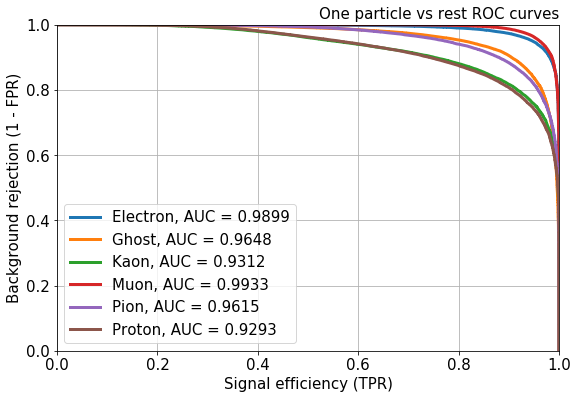

In [37]:
utils.plot_roc_curves(proba, validation_data.Class.values)

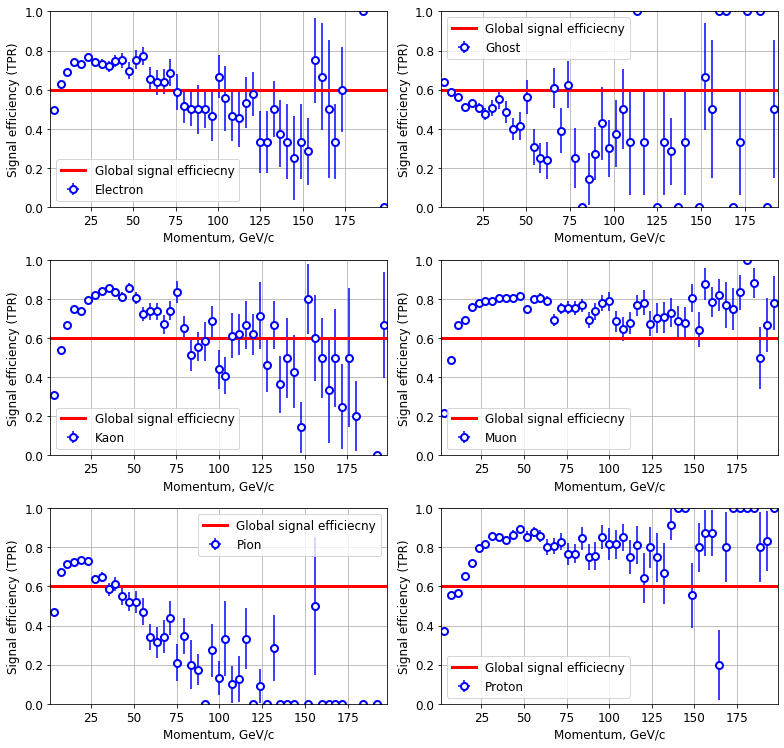

In [38]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

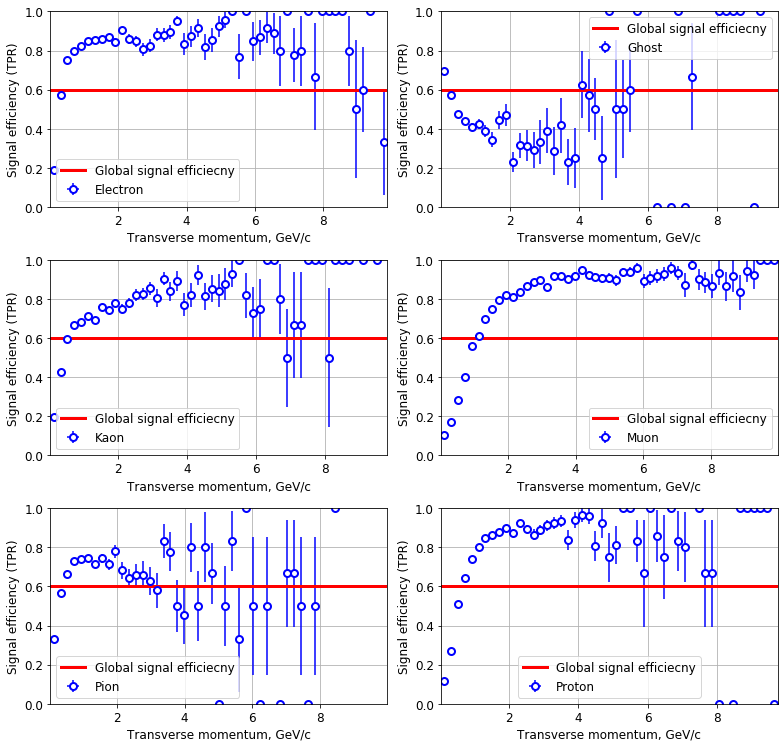

In [39]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

## Prepare submission

In [40]:
test = pandas.read_csv('test.csv.gz')

In [41]:
best_model = nn

In [42]:
test_scale = scaler.transform(test[features])

In [43]:
# predict test sample
submit_proba = best_model.predict_proba(test_scale)
submit_ids = test.ID

In [44]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/Users/charlottefettes/Downloads/AML-7/week2/submission_file.csv.gz